# A Pi Day Puzzle (2025.03.14)

link: https://thefiddler.substack.com/p/a-pi-day-puzzle

In [2]:
from IPython import display

## I. Puzzle

You are planning a picnic on the remote tropical island of $\pi$-land. The island’s shape is a perfect semi-disk with two beaches, as illustrated below: Semicircular Beach (along the northern semicircular edge of the disk) and Diametric Beach (along the southern diameter of the disk).


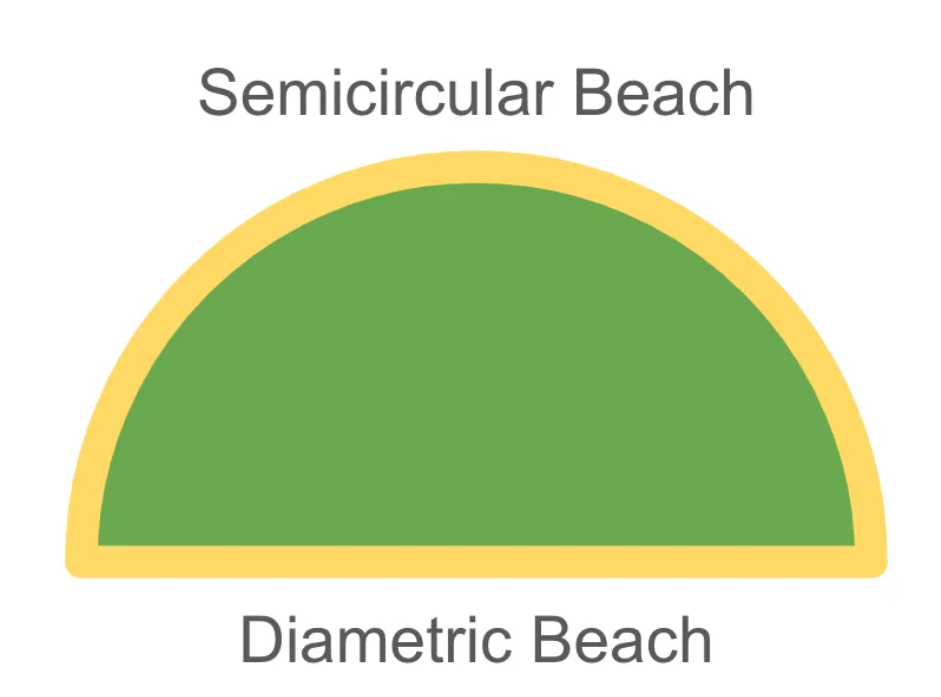

In [3]:
display.Image("files/pi-land.png", width = 200)

If you pick a random spot on $\pi$-land for your picnic, what is the probability that it will be closer to Diametric Beach than to Semicircular Beach? (Unlike the illustrative diagram above, assume the beaches have zero width.)

# II. Solution

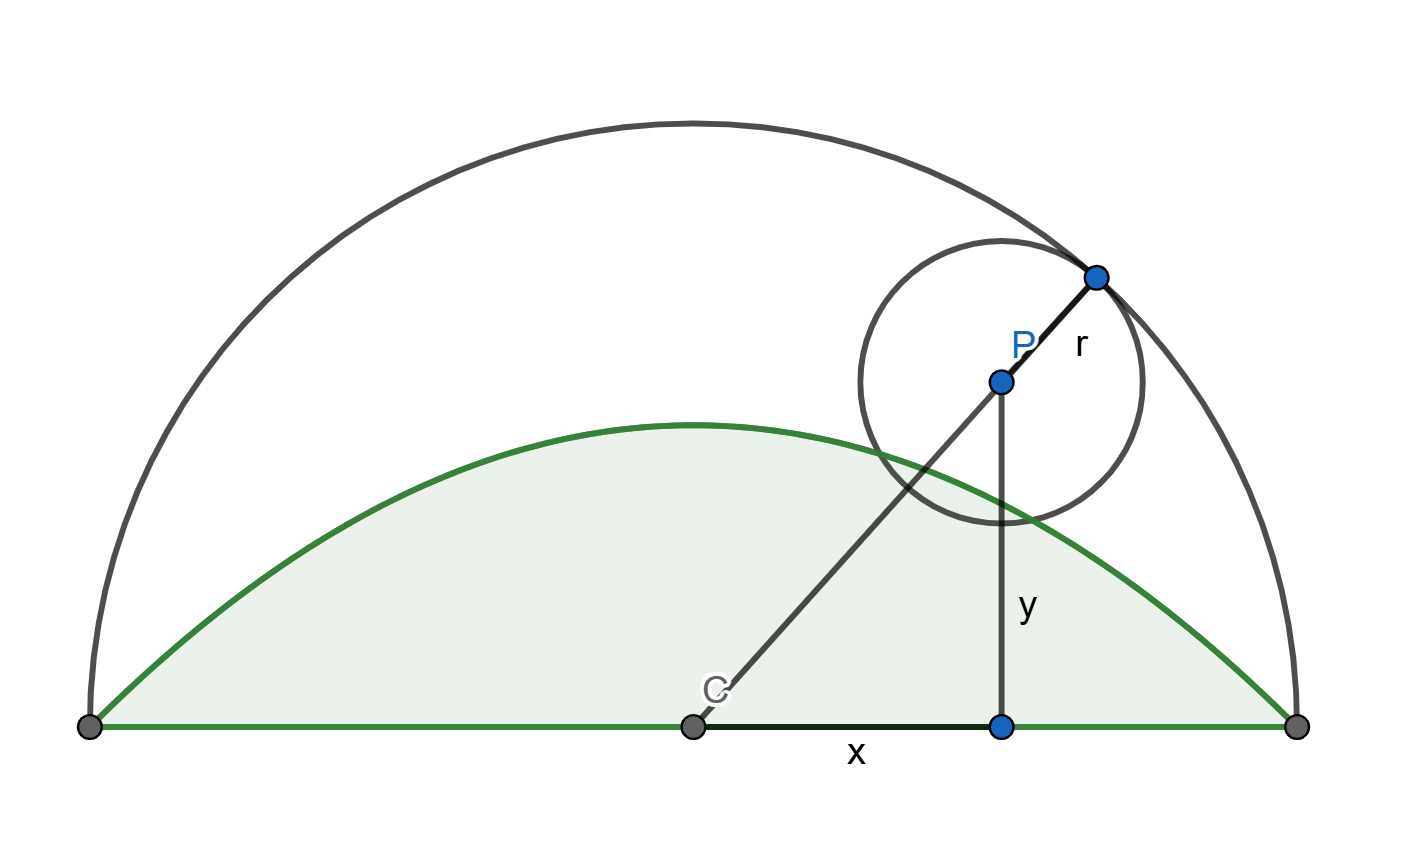

In [7]:
display.Image("files/pi-land 2.png", width = 600)


We call the centre of 'Diametric Beach' $C$ and assume that the  distance between C and 'Semicircular Beach' is 1.

Due to the symmetry will can focus our analysis on a quarter circle only.

We start with a random point $P$ within the quarter circle and draw a circle around $P$ so that this circle is tangent to the 'Semicircular Beach'. The radius $r$ of the circle give us the distance to 'Semicircular Beach'.

From 'Diametric Beach' we draw a perpendicular line that goes through $P$ as that is the shortest path from $P$ to the 'Diametric Beach'. We call the distance between $P$ and 'Diametric Beach' $y$ and the distance between $C$ and the intersection as $x$.

From the Solution to ["Can You Squeeze the Heart?"](https://thefiddler.substack.com/p/can-you-defend-your-trivia-knowledge) we know that $C$, $P$ and the point of tangency of the circle and 'Semicircular Beach' are collinear. As the distance between $C$ and 'Semicircular Beach' is 1 we know that $r = 1 - \overline{CP}$. With the help of Pythagoras we can transfer this into $r = 1- \sqrt{x^2+y^2}$.

Our picnic spot will be closer to 'Diametric Beach' than to 'Semicircular Beach' if $y$ is smaller than $r$: $$1- \sqrt{x^2+y^2}-y\geq0$$
Solving this equation by $y$ gives us:
$$y: f(x) =\frac{1-x^2}{2} $$
The function tells us how far we can go 'north' at a given point $x$ until the distance to 'Semicircular Beach' will be shorter than the distance to 'Diametric Beach'.
To calculate the probability that our picnic is closer to 'Diametric Beach' we need the area under the function $f$:
$$F(x) = \int \frac{1-x^2}{2} dx= \frac{3x-x^3}{6}$$
The area under the function $f$ for $0 \leq x \leq 1$ is $1/3$ and the area of the quarter circle is $1/4 \cdot \pi$.


**Solution**: The probability that the picnic will be closer to Diametric Beach is
$$P = \frac{1/3}{1/4\cdot \pi}= \frac{4}{3\pi}\approx 0.424$$

We are happy to see $\pi$ in the solution. If we lost our calculator, here is an easy and practical approach to determine $\pi$ on [youtube.com](https://www.youtube.com/watch?v=HEfHFsfGXjs).

# III. Simulation

In [31]:
import numpy as np
import pandas as pd

In [33]:
n_trials = 1_000_000

data = pd.DataFrame({
    'x': np.random.random(n_trials),
    'y': np.random.random(n_trials)
})

data['square_product'] = data['x']**2 + data['y']**2 
data['within_circle'] = data['square_product'] < 1
data['diametric_beach'] = data['y'] < (1 - np.sqrt(data['square_product'])) #diametric_beach is closer

p = ((data['within_circle'] == True) & (data['diametric_beach'] == True)).sum() / (data['within_circle'] == True).sum() 

print(f'The probability that the picknick will be closer to Diametric Beach is approx. {p:.3f}.')

The probability that the picknick will be closer to Diametric Beach is approx. 0.425.
